In [1]:
import pandas as pd
import numpy as np

In [2]:
# read csv
df = pd.read_csv('ukdw.csv')

In [3]:
df['content']

0       @yoshudahlahya @radgvrl @niramaya_ Ayoo ke war...
1       UKDW dan Hanseo University Korea Gelar Global ...
2       @cine21_editor ukdw #중절가능한병원 [중절비용 aaww2277@gm...
3       Bimbingan Khusus Masuk UKDW Program Studi Pend...
4       PELATIHAN BREVET PAJAK A&amp;B UKDW\n(Angkatan...
                              ...                        
1617            @jogjamfs katanya depan ukdw bnyak yg ena
1618    Lulusan UKDW Dituntut Siap Hadapi 'VUCA World'...
1619    @MyWarteg @Sarah_Pndj Banyak Universitas Kirst...
1620     @eunikedl @dosgreb Ukdw aku belum perna loh suer
1621    Dijual rumah lokasi istimewa depan kampus UKDW...
Name: content, Length: 1622, dtype: object

# Rename Raw Data

In [4]:
df['content'].to_csv('ukdw-raw.csv')

### Text Preprocessing

In [5]:
import re
import nltk
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
from nltk.corpus import stopwords

### Regex Cleansing

In [6]:
def cleantext(tweet):
    tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet).split())
    tweet = re.sub(r'^http://t.co/[a-zA-Z0-9]*\s', ' ', tweet)
    tweet = re.sub(r'\s+http://t.co/[a-zA-Z0-9]*\s', ' ', tweet)
    tweet = re.sub(r'\s+http://t.co/[a-zA-Z0-9]*$', ' ', tweet)
    tweet = re.sub(r'^www://t.co/[a-zA-Z0-9]*\s', ' ', tweet)
    tweet = re.sub(r'\s+//www://t.co/[a-zA-Z0-9]*\s', ' ', tweet)
    tweet = re.sub(r'\s+//www://t.co/[a-zA-Z0-9]*$', ' ', tweet)
    tweet = tweet.lower()
    tweet = re.sub(r"\W"," ",tweet)
    tweet = re.sub(r"\d"," ",tweet)
    tweet = re.sub(r"\s+[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+[a-z]$"," ",tweet)
    tweet = re.sub(r"^[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+"," ",tweet)
    return tweet

In [7]:
dfc = df['content'].apply(cleantext)

In [8]:
dfc

0             ayoo ke warung buto enaaa jangan yg di ukdw
1       ukdw dan hanseo university korea gelar global ...
2                                    editor ukdw aaww com
3       bimbingan khusus masuk ukdw program studi pend...
4       pelatihan brevet pajak amp ukdw angkatan kelas...
                              ...                        
1617                      katanya depan ukdw bnyak yg ena
1618         lulusan ukdw dituntut siap hadapi vuca world
1619    pndj banyak universitas kirsten uksw ukdw ukri...
1620                        ukdw aku belum perna loh suer
1621    dijual rumah lokasi istimewa depan kampus ukdw...
Name: content, Length: 1622, dtype: object

## Stemming

In [9]:
dfcs = dfc.apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

In [10]:
dfcs

0             ayoo ke warung buto enaaa jangan yg di ukdw
1       ukdw dan hanseo university korea gelar global ...
2                                    editor ukdw aaww com
3       bimbing khusus masuk ukdw program studi didik ...
4       latih brevet pajak amp ukdw angkat kelas eksek...
                              ...                        
1617                         kata depan ukdw bnyak yg ena
1618              lulus ukdw tuntut siap hadap vuca world
1619    pndj banyak universitas kirsten uksw ukdw ukri...
1620                        ukdw aku belum perna loh suer
1621    jual rumah lokasi istimewa depan kampus ukdw p...
Name: content, Length: 1622, dtype: object

## Stopwords

In [11]:
dfcst = dfcs.apply(lambda x: ' '.join([word for word 
                                   in x.split() if word not in stopwords.words('indonesian')]))

In [12]:
dfcst

0                          ayoo warung buto enaaa yg ukdw
1       ukdw hanseo university korea gelar global lead...
2                                    editor ukdw aaww com
3       bimbing khusus masuk ukdw program studi didik ...
4       latih brevet pajak amp ukdw angkat kelas eksek...
                              ...                        
1617                                    ukdw bnyak yg ena
1618                   lulus ukdw tuntut hadap vuca world
1619    pndj universitas kirsten uksw ukdw ukrida meth...
1620                                  ukdw perna loh suer
1621    jual rumah lokasi istimewa kampus ukdw persis ...
Name: content, Length: 1622, dtype: object

# Rename Cleaned Data

In [13]:
dfcst.to_csv('ukdw-cleaned.csv')

### TF-IDF Vectorizer

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = dfcst
vectorizer = TfidfVectorizer(max_features=2000, min_df=3, max_df=0.6, 
                             stop_words=stopwords.words('indonesian'))
X = vectorizer.fit_transform(corpus).toarray()

D:\Atmajaya\Anaconda\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [15]:
tfidf = pd.DataFrame(X, columns=vectorizer.get_feature_names()).sum().sort_values(ascending=False)

# Rename TF-IDF

In [16]:
tfidf.to_csv('tfidf-ukdw.csv')

### POS-Tagging

In [17]:
from nltk.tag import CRFTagger

In [18]:
def preprocessing(text):
    case_folded = text.lower()
    tokenized = nltk.word_tokenize(case_folded)
    return tokenized

In [19]:
dfcst_preprocessed = dfcst.apply(preprocessing)

In [22]:
dfcst_preprocessed

0                   [ayoo, warung, buto, enaaa, yg, ukdw]
1       [ukdw, hanseo, university, korea, gelar, globa...
2                               [editor, ukdw, aaww, com]
3       [bimbing, khusus, masuk, ukdw, program, studi,...
4       [latih, brevet, pajak, amp, ukdw, angkat, kela...
                              ...                        
1617                               [ukdw, bnyak, yg, ena]
1618            [lulus, ukdw, tuntut, hadap, vuca, world]
1619    [pndj, universitas, kirsten, uksw, ukdw, ukrid...
1620                             [ukdw, perna, loh, suer]
1621    [jual, rumah, lokasi, istimewa, kampus, ukdw, ...
Name: content, Length: 1622, dtype: object

In [23]:
ct = CRFTagger()
ct.set_model_file('all_indo_man_tag_corpus_model.crf.tagger')

In [24]:
tag = ct.tag_sents(dfcst_preprocessed)

In [25]:
tag

[[('ayoo', 'NN'),
  ('warung', 'NN'),
  ('buto', 'NN'),
  ('enaaa', 'NN'),
  ('yg', 'FW'),
  ('ukdw', 'FW')],
 [('ukdw', 'FW'),
  ('hanseo', 'FW'),
  ('university', 'FW'),
  ('korea', 'FW'),
  ('gelar', 'FW'),
  ('global', 'FW'),
  ('leadership', 'FW'),
  ('program', 'NN')],
 [('editor', 'NN'), ('ukdw', 'FW'), ('aaww', 'FW'), ('com', 'FW')],
 [('bimbing', 'RB'),
  ('khusus', 'JJ'),
  ('masuk', 'VB'),
  ('ukdw', 'NN'),
  ('program', 'NN'),
  ('studi', 'NN'),
  ('didik', 'NN'),
  ('dokter', 'NN'),
  ('lkbb', 'NN'),
  ('indonesia', 'NN'),
  ('college', 'FW'),
  ('yogyakarta', 'FW'),
  ('cp', 'FW')],
 [('latih', 'VB'),
  ('brevet', 'NN'),
  ('pajak', 'NN'),
  ('amp', 'FW'),
  ('ukdw', 'FW'),
  ('angkat', 'NN'),
  ('kelas', 'NN'),
  ('eksekutif', 'NN'),
  ('laksana', 'NN'),
  ('kelas', 'NN'),
  ('sabtu', 'NN'),
  ('tanggal', 'NN'),
  ('mar', 'NN'),
  ('mei', 'NN'),
  ('wib', 'JJ')],
 [('tampil', 'JJ'),
  ('dosen', 'CD'),
  ('fakultas', 'NN'),
  ('teologi', 'NN'),
  ('natal', 'FW'),
  ('kamp

In [26]:
df_tagger = pd.DataFrame([j for i in tag for j in i])

In [27]:
df_tagger = df_tagger.rename(columns={0:'Word',1:'POS'})

In [28]:
df_tagger

,Word,POS
0,ayoo,NN
1,warung,NN
2,buto,NN
3,enaaa,NN
4,yg,FW
...,...,...
17063,kost,FW
17064,warmindo,FW
17065,laundry,FW
17066,rumah,NN


# Rename POS Tagger

In [29]:
df_tagger.to_csv('ukdw-tagger.csv')

### Merge Dataset

In [30]:
tfidf = pd.DataFrame(tfidf).reset_index().rename(columns={'index':'Word', 0:'Weight'})

In [31]:
weighted_tag = tfidf.merge(df_tagger).drop_duplicates(subset='Word').reset_index().drop('index',axis=1)

In [32]:
weighted_tag.to_csv('weighted_tag-ukdw.csv')

In [33]:
pos_tag = pd.concat([weighted_tag[weighted_tag['POS']=='JJ'].head(50), 
          weighted_tag[weighted_tag['POS']=='NN'].head(50),
          weighted_tag[weighted_tag['POS']=='VB'].head(50)]).reset_index().drop('index',axis=1)

In [34]:
pos_tag.to_csv('pos_tag-ukdw.csv')

### bi-gram

In [35]:
pd.Series(nltk.ngrams(nltk.word_tokenize(' '.join([i for i in dfcst.dropna()])),2)).value_counts()

(umy, bandung)                138
(bandung, india)              138
(youtube, sabda)              136
(kampus, ukdw)                134
(ukdw, yogyakarta)             82
                             ... 
(tampil, kui)                   1
(kemarin, ga)                   1
(kalo, mahasiswa)               1
(kalo, makan)                   1
(tumpengmini, tumpengunik)      1
Length: 11343, dtype: int64

In [36]:
bigram_df = pd.Series(nltk.ngrams(nltk.word_tokenize(' '.join([i for i in dfcst.dropna()])),
                      2)).value_counts().head(20)\
.to_frame().reset_index().rename(columns={0:'bigram',1:'count'})

In [37]:
bigram_df

,index,bigram
0,"(umy, bandung)",138
1,"(bandung, india)",138
2,"(youtube, sabda)",136
3,"(kampus, ukdw)",134
4,"(ukdw, yogyakarta)",82
5,"(fakultas, teologi)",70
6,"(profile, youtube)",69
7,"(ukdw, profile)",69
8,"(dosen, fakultas)",67
9,"(natal, kampus)",67


In [38]:
# create dictionary of bigrams and their counts
d = bigram_df.set_index('index').T.to_dict('records')

In [39]:
d

[{('umy', 'bandung'): 138,
  ('bandung', 'india'): 138,
  ('youtube', 'sabda'): 136,
  ('kampus', 'ukdw'): 134,
  ('ukdw', 'yogyakarta'): 82,
  ('fakultas', 'teologi'): 70,
  ('profile', 'youtube'): 69,
  ('ukdw', 'profile'): 69,
  ('dosen', 'fakultas'): 67,
  ('natal', 'kampus'): 67,
  ('tampil', 'dosen'): 67,
  ('version', 'youtube'): 67,
  ('full', 'version'): 67,
  ('teologi', 'natal'): 67,
  ('ukdw', 'full'): 67,
  ('ukdw', 'ukdw'): 51,
  ('kcc', 'sejong'): 50,
  ('center', 'ukdw'): 49,
  ('korean', 'center'): 49,
  ('ligamahasiswa', 'awalmasadepan'): 45}]

In [40]:
import networkx as nx

In [41]:
# create network plot
G = nx.Graph()

# create connections between nodes
for k,v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v*10))
    
G.add_node("ukdw",weight=100)

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

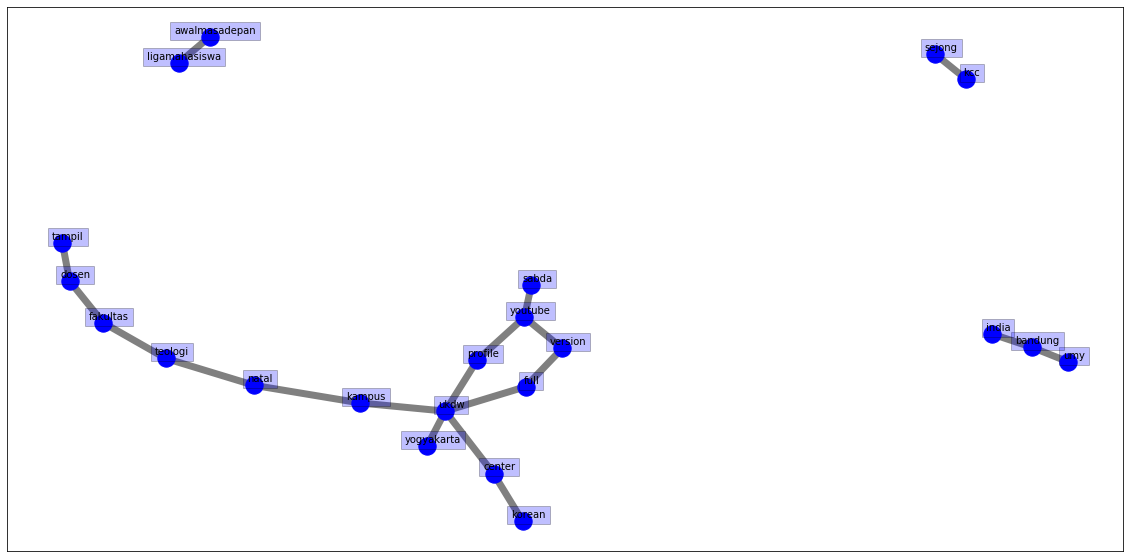

In [43]:
fig, ax = plt.subplots(figsize=(20,10))

pos = nx.spring_layout(G, k=2)

# plot networks
nx.draw_networkx(G, pos,
                font_size=10,
                width=7,
                edge_color='grey',
                node_color='blue',
                with_labels=False,
                ax=ax)

# create offset labels
for key, value in pos.items():
    x,y = value[0]+.01, value[1]+.01
    ax.text(x, y,
           s=key,
           bbox=dict(facecolor='blue', alpha=0.25),
           horizontalalignment='center', fontsize=10)
    
plt.show()

### tri-grams

In [44]:
pd.Series(nltk.ngrams(nltk.word_tokenize(' '.join([i for i in dfcst.dropna()])),3)).value_counts()

(umy, bandung, india)         138
(profile, youtube, sabda)      69
(ukdw, profile, youtube)       69
(dosen, fakultas, teologi)     67
(tampil, dosen, fakultas)      67
                             ... 
(mantan, anak, selatan)         1
(suguh, parade, ukdw)           1
(babi, dpan, ukdw)              1
(juang, nilai, mulia)           1
(ya, kidul, ukdw)               1
Length: 13324, dtype: int64

In [45]:
trigram_df = pd.Series(nltk.ngrams(nltk.word_tokenize(' '.join([i for i in dfcst.dropna()])),
                      3)).value_counts().head(20)\
.to_frame().reset_index().rename(columns={0:'trigram',1:'count'})

In [46]:
trigram_df

,index,trigram
0,"(umy, bandung, india)",138
1,"(profile, youtube, sabda)",69
2,"(ukdw, profile, youtube)",69
3,"(dosen, fakultas, teologi)",67
4,"(tampil, dosen, fakultas)",67
5,"(fakultas, teologi, natal)",67
6,"(version, youtube, sabda)",67
7,"(kampus, ukdw, full)",67
8,"(ukdw, full, version)",67
9,"(full, version, youtube)",67


In [47]:
# create dictionary of bigrams and their counts
d1 = trigram_df.set_index('index').T.to_dict('records')

In [48]:
d1

[{('umy', 'bandung', 'india'): 138,
  ('profile', 'youtube', 'sabda'): 69,
  ('ukdw', 'profile', 'youtube'): 69,
  ('dosen', 'fakultas', 'teologi'): 67,
  ('tampil', 'dosen', 'fakultas'): 67,
  ('fakultas', 'teologi', 'natal'): 67,
  ('version', 'youtube', 'sabda'): 67,
  ('kampus', 'ukdw', 'full'): 67,
  ('ukdw', 'full', 'version'): 67,
  ('full', 'version', 'youtube'): 67,
  ('natal', 'kampus', 'ukdw'): 67,
  ('teologi', 'natal', 'kampus'): 67,
  ('korean', 'center', 'ukdw'): 49,
  ('id', 'ligamahasiswa', 'awalmasadepan'): 32,
  ('center', 'ukdw', 'buka'): 32,
  ('kcc', 'sejong', 'korean'): 31,
  ('sejong', 'korean', 'center'): 31,
  ('fad', 'ukdw', 'yogyakarta'): 30,
  ('jireh', 'tour', 'transport'): 30,
  ('cv', 'jireh', 'tour'): 30}]

In [49]:
# create network plot
G = nx.Graph()

# create connections between nodes
for k,v in d1[0].items():
    G.add_edge(k[0], k[1], weight=(v*10))
    
G.add_node("ukdw",weight=100)

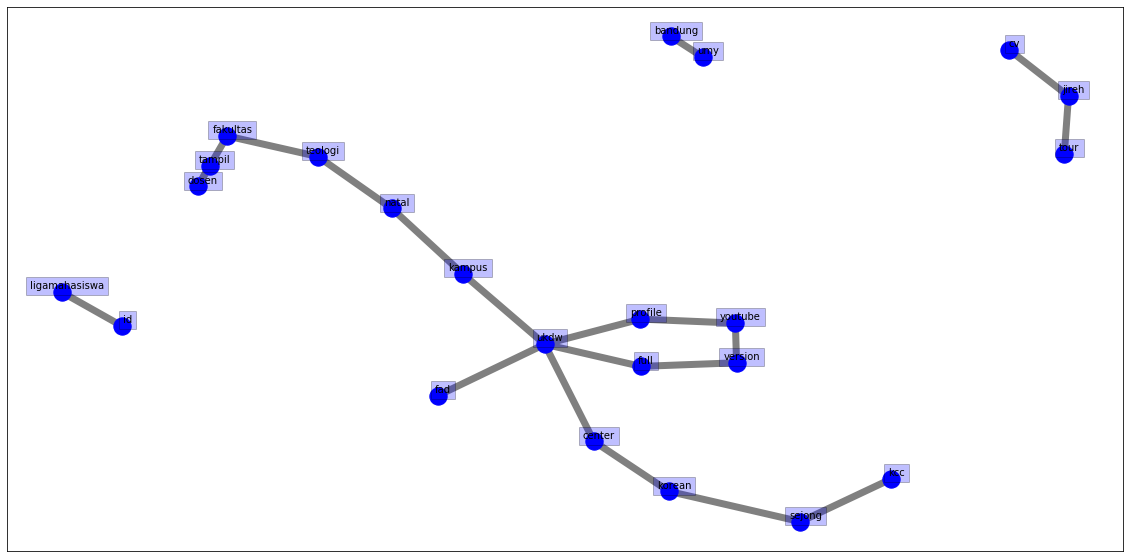

In [52]:
fig, ax = plt.subplots(figsize=(20,10))

pos = nx.spring_layout(G, k=3)

# plot networks
nx.draw_networkx(G, pos,
                font_size=10,
                width=7,
                edge_color='grey',
                node_color='blue',
                with_labels=False,
                ax=ax)

# create offset labels
for key, value in pos.items():
    x,y = value[0]+.01, value[1]+.01
    ax.text(x, y,
           s=key,
           bbox=dict(facecolor='blue', alpha=0.25),
           horizontalalignment='center', fontsize=10)
    
plt.show()

In [51]:
pwd

'C:\\Users\\Andika\\Desktop\\Project UNISA\\in depth analysis\\kampus kristiani jogja\\ukdw'